# Project: European Football data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#dataexp">Exploratory Data Analysis</a></li>
<li><a href="#con">Conclusions</a></li>
</ul>

### About the dataset from Kaggle (reference : https://www.kaggle.com/hugomathien/soccer)

The ultimate Soccer database for data analysis and machine learning
What you get:

+25,000 matches <br>
+10,000 players <br>
11 European Countries with their lead championship <br>
Seasons 2008 to 2016 <br>
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates <br>
Team line up with squad formation (X, Y coordinates) <br>
Betting odds from up to 10 providers <br>
Detailed match events (goal types, possession, corner, cross, fouls, cards etc…) for +10,000 matches

<a id='intro'></a>
## Introduction: 
### Questions selected to be answered using the project: <br> 
1. Which team has won the most number of league championships? <br> 
2. Which team perform better in home or away matches? <br> 
3. Which player in European league showed the most improved performance throughout his career? <br> 
4. Is there any definite correlation between player physical qualities vs his rating? 

> The exclusive database is from Kaggle and consists of data for soccer matches, players and teams from several European countries from 2008 to 2016. With the means of data analysis, the report finds out the team which won most number of titles in English Premier League for 2008 to 2016 and finds out if they score more in home or aways matches. The report also tries to find out the player in European league who showed the highest improvement in his overall rating. The report tries to visualize the player attributes.

In [85]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
# each table in the database were saved as csv files in my local harddrive
# Load country, league, match, player details to a dataframe
filepath="C:\\Users\\ncherian\\OneDrive - ERG SpA\\Desktop\\ERG\\personal\\Udacity nanodegree\\Project 2\\Data\\";
country=pd.read_csv(filepath+"country.csv");
leagues=pd.read_csv(filepath+"League.csv");
matches=pd.read_csv(filepath+"Match.csv");
team=pd.read_csv(filepath+"Team.csv")
player=pd.read_csv(filepath+"Player.csv")
playeratri=pd.read_csv(filepath+"Player_Attributes.csv")
teamatri=pd.read_csv(filepath+"Team_Attributes.csv")

In [87]:
# check leauge ID for English Premier League
leagues

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [88]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [89]:
# select only necessary columns, with only matches in English Premier League
eplmatches=matches.query('league_id=="1729"').iloc[:,3:11]
eplmatches.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
1728,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1,1
1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1,0
1730,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,0,1
1731,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,2,1
1732,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,4,2


In [90]:
#check if home team ids and away team ids are same
set(matches['home_team_api_id'].unique())==set(matches['away_team_api_id'].unique())

True

### Q1 . Which team has won the most number of league championships in EPL?

In [91]:
#New dataframe for recording the standings
eplseasons=eplmatches['season'].unique()
eplstandings = pd.DataFrame(columns=['season', 'team_id', 'name', 'win', 'draw', 'lose', 'point'])

hometeams=eplmatches['home_team_api_id'].unique()
i=0
for season in eplseasons:
    for team_id in hometeams:
        eplstandings.loc[i] = [season, team_id, team.query('team_api_id == @team_id')['team_long_name'].values[0], 0, 0, 0, 0]
        i=i+1;
eplstandings

,season,team_id,name,win,draw,lose,point
0,2008/2009,10260,Manchester United,0,0,0,0
1,2008/2009,9825,Arsenal,0,0,0,0
2,2008/2009,8472,Sunderland,0,0,0,0
3,2008/2009,8654,West Ham United,0,0,0,0
4,2008/2009,10252,Aston Villa,0,0,0,0
...,...,...,...,...,...,...,...
267,2015/2016,9826,Crystal Palace,0,0,0,0
268,2015/2016,8344,Cardiff City,0,0,0,0
269,2015/2016,8197,Leicester City,0,0,0,0
270,2015/2016,8678,Bournemouth,0,0,0,0


In [92]:
# Fill the points in the standings table according to English Premier League match records
for index, row in eplmatches.iterrows():
    each_season = row['season']
    home_team = row['home_team_api_id']
    away_team = row['away_team_api_id']
    home_index = eplstandings.query('season== @each_season').query('team_id== @home_team').index.values[0]
    away_index = eplstandings.query('season == @each_season').query('team_id== @away_team').index.values[0]
    if row['home_team_goal'] > row['away_team_goal']:
        eplstandings.loc[home_index, 'win'] = eplstandings.loc[home_index, 'win'] + 1
        eplstandings.loc[home_index, 'point'] = eplstandings.loc[home_index, 'point'] + 3
        eplstandings.loc[away_index, 'lose'] = eplstandings.loc[away_index, 'lose'] + 1
    elif row['home_team_goal'] == row['away_team_goal']:
        eplstandings.loc[home_index, 'draw'] = eplstandings.loc[home_index, 'draw'] + 1
        eplstandings.loc[home_index, 'point'] = eplstandings.loc[home_index, 'point'] + 1
        eplstandings.loc[away_index, 'draw'] = eplstandings.loc[away_index, 'draw'] + 1
        eplstandings.loc[away_index, 'point'] = eplstandings.loc[away_index, 'point'] + 1
    else:
        eplstandings.loc[home_index, 'lose'] = eplstandings.loc[home_index, 'lose'] + 1
        eplstandings.loc[away_index, 'win'] = eplstandings.loc[away_index, 'win'] + 1
        eplstandings.loc[away_index, 'point'] = eplstandings.loc[away_index, 'point'] + 3
        
eplstandings.sort_values(['season', 'point'], ascending=[True, False], inplace=True)


In [93]:
# ranking based on points
eplstandings['point']=eplstandings['point'].astype(int)
eplstandings['rank'] = eplstandings.groupby('season')['point'].rank(ascending=False).astype(int)
eplstandings.head()

,season,team_id,name,win,draw,lose,point,rank
0,2008/2009,10260,Manchester United,28,6,4,90,1
11,2008/2009,8650,Liverpool,25,11,2,86,2
9,2008/2009,8455,Chelsea,25,8,5,83,3
1,2008/2009,9825,Arsenal,20,12,6,72,4
5,2008/2009,8668,Everton,17,12,9,63,5


In [94]:
eplstandings.query('rank=="1"')['name'].value_counts()


Manchester United    4
Manchester City      2
Chelsea              2
Leicester City       1
Name: name, dtype: int64

In [95]:
eplstandings.query('rank=="1"').query('name=="Manchester United"')['season']

0      2008/2009
68     2010/2011
102    2011/2012
136    2012/2013
Name: season, dtype: object

> 1. Which team has won the most number of league championships? Manchester United - 4 times (2008/2009,2010/2011,2011/2012 and 2012/2013)

In [96]:
eplmatches.groupby('home_team_api_id')['home_team_goal'].sum()

home_team_api_id
8191      39
8197      63
8344      20
8455     333
8456     365
8462      50
8466     134
8472     184
8483      30
8528     106
8549      17
8559     104
8586     255
8602      62
8650     294
8654     195
8655      98
8658      38
8659     177
8667      79
8668     258
8678      23
9798      23
9817      20
9825     306
9826      58
9850      96
9879     173
10003    135
10172     60
10194    204
10252    179
10260    338
10261    199
Name: home_team_goal, dtype: int64

In [97]:
team[team['team_api_id']==8456]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
34,3466,8456,10.0,Manchester City,MCI


In [98]:
eplmatches.groupby('away_team_api_id')['away_team_goal'].sum()

away_team_api_id
8191      31
8197      51
8344      12
8455     250
8456     241
8462      22
8466      82
8472     149
8483      25
8528      94
8549      11
8559      77
8586     226
8602      56
8650     237
8654     131
8655      77
8658      37
8659     128
8667      65
8668     181
8678      22
9798      20
9817      20
9825     267
9826      61
9850      64
9879      92
10003     98
10172     55
10194    118
10252    156
10260    244
10261    125
Name: away_team_goal, dtype: int64

In [99]:
eplmatches.groupby('away_team_api_id')['away_team_goal'].sum()+eplmatches.groupby('home_team_api_id')['home_team_goal'].sum()

away_team_api_id
8191      70
8197     114
8344      32
8455     583
8456     606
8462      72
8466     216
8472     333
8483      55
8528     200
8549      28
8559     181
8586     481
8602     118
8650     531
8654     326
8655     175
8658      75
8659     305
8667     144
8668     439
8678      45
9798      43
9817      40
9825     573
9826     119
9850     160
9879     265
10003    233
10172    115
10194    322
10252    335
10260    582
10261    324
dtype: int64

In [100]:
team[team['team_api_id']==9825]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
27,3459,9825,1.0,Arsenal,ARS


> Q2   The Team in England Premier League which scored most Home goals from 2008-2016 is Manchester City <br>
       The Team in England Premier League which scored most Away goals from 2008-2016 is Arsenal <br>
       The Team in England Premier League which scored most number of goals from 2008-2016 (Home+Away) is Manchester City

### Q3. Which player showed the most improved performance throughout his career?

In [101]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [102]:
playeratri.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


> The player atributes data gives overall rating of players in different seasons

<a id='wrangling'></a> 
### Data cleaning and wrangling

In [103]:
# merging player and player atribute data to one table
simpleplayeratri=playeratri.iloc[:,:5];
playerdf=player.merge(simpleplayeratri,left_on='player_api_id',right_on='player_api_id',how='inner')
playerdf.drop(columns=['id_x','id_y','player_fifa_api_id_x','player_fifa_api_id_y'],inplace=True)
playerdf.head()

,player_api_id,player_name,birthday,height,weight,date,overall_rating
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18 00:00:00,67.0
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19 00:00:00,67.0
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21 00:00:00,62.0
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20 00:00:00,61.0
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22 00:00:00,61.0


In [104]:
playerdf.dtypes;
eplmatches.dtypes

season              object
stage                int64
date                object
match_api_id         int64
home_team_api_id     int64
away_team_api_id     int64
home_team_goal       int64
away_team_goal       int64
dtype: object

In [105]:
#date is is a string, we need to identify the date in the table is in which season. When is the season start and end for EPL?
#first lets change the string to date in all the dataframes
eplmatches['date'] = pd.to_datetime(eplmatches['date'])
playerdf['date'] = pd.to_datetime(playerdf['date'])
# When is the season start and end for EPL?
for season in eplmatches['season'].unique():
    min = eplmatches.query('season == @season')['date'].min()
    max = eplmatches.query('season == @season')['date'].max()
    print("<",season,">", "min: ",min, "   max: ",max)

< 2008/2009 > min:  2008-08-16 00:00:00    max:  2009-05-24 00:00:00
< 2009/2010 > min:  2009-08-15 00:00:00    max:  2010-05-09 00:00:00
< 2010/2011 > min:  2010-08-14 00:00:00    max:  2011-05-22 00:00:00
< 2011/2012 > min:  2011-08-13 00:00:00    max:  2012-05-13 00:00:00
< 2012/2013 > min:  2012-08-18 00:00:00    max:  2013-05-19 00:00:00
< 2013/2014 > min:  2013-08-17 00:00:00    max:  2014-05-11 00:00:00
< 2014/2015 > min:  2014-08-16 00:00:00    max:  2015-05-24 00:00:00
< 2015/2016 > min:  2015-08-08 00:00:00    max:  2016-05-17 00:00:00


In [106]:
# season start is in August and end in May every year
# user defined function to create season column from dates in playerdf dataframe
def to_season (date):
    if date.month >= 8:
        return str(date.year)+"/"+str(date.year+1)
    else:
        return str(date.year-1)+"/"+str(date.year)


In [107]:
playerdf['season'] = playerdf['date'].apply(lambda x : to_season(x))
playerdf.head()

,player_api_id,player_name,birthday,height,weight,date,overall_rating,season
0,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2016-02-18,67.0,2015/2016
1,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-11-19,67.0,2015/2016
2,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-09-21,62.0,2015/2016
3,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2015-03-20,61.0,2014/2015
4,505942,Aaron Appindangoye,1992-02-29 00:00:00,182.88,187,2007-02-22,61.0,2006/2007


In [108]:
# user function to find season rating of player and find the maximum change in rating to find change in overall rating
def diff_rating (playerid):
    season_rating = playerdf.query('player_api_id ==  @playerid').groupby('season')['overall_rating'].mean()
    return season_rating.max() - season_rating.min()


In [109]:
player['change'] = player['player_api_id'].apply(lambda x : diff_rating(x))

player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,change
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4.333333
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,23.375000
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,10.200000
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,7.000000
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,8.000000


In [110]:
player[player['change']==player['change'].max()]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,change
6715,6725,129944,Marco Reus,188350,1989-05-31 00:00:00,180.34,165,42.0


> Marco Reus showed the highest change in overall rating across the seasons

<a id='dataexp'></a>
### Q3. Data exploration to visualize player rating with attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A4AB319CC8>,
      dtype=object)

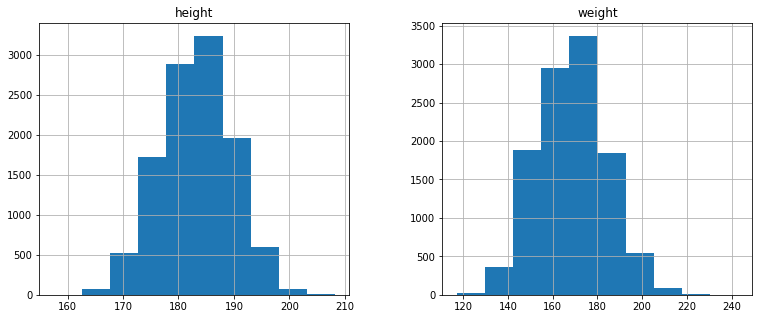

In [111]:
player[['height', 'weight']].hist(figsize = (20, 5), layout = (1, 3))

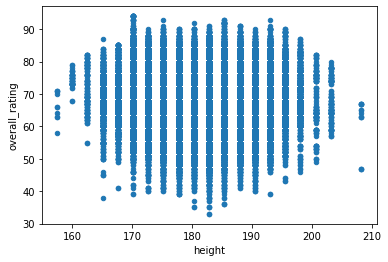

In [112]:
playerdf.plot(x='height',y='overall_rating',kind='scatter')

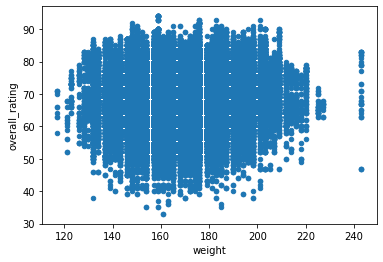

In [113]:
playerdf.plot(x='weight',y='overall_rating',kind='scatter')

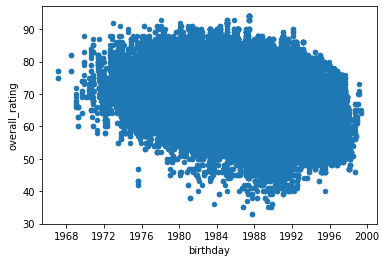

In [114]:
playerdf['birthday']=pd.to_datetime(playerdf['birthday'])
playerdf.plot(x='birthday',y='overall_rating',kind='scatter')

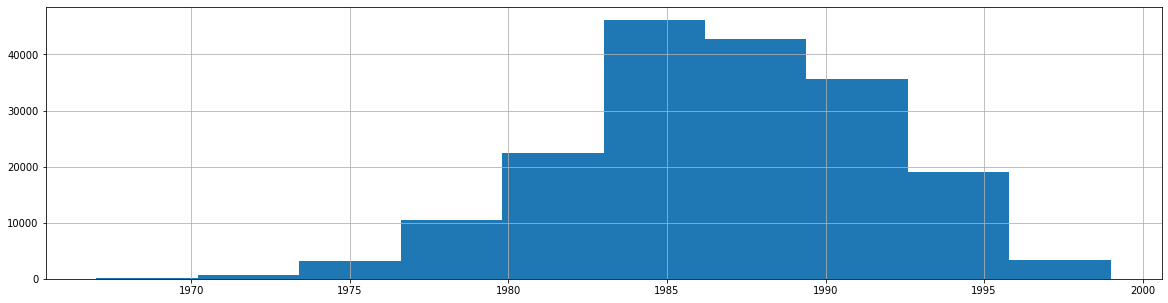

In [115]:
playerdf['birthyear'] = playerdf['birthday'].apply(lambda x: x.year)
playerdf['birthyear'].hist(figsize = (20, 5))

In [116]:
playerdf[['birthyear', 'height', 'weight']].describe()

,birthyear,height,weight
count,183978.000000,183978.000000,183978.000000
mean,1986.784887,181.878872,168.776245
std,4.866379,6.394818,15.088920
min,1967.000000,157.480000,117.000000
25%,1983.000000,177.800000,159.000000
50%,1987.000000,182.880000,168.000000
75%,1990.000000,185.420000,179.000000
max,1999.000000,208.280000,243.000000


> The age of the players in the european league seems to be left skewed with more number of young players (born after 1986). Height and weight distributions show normal distributed forms. The average height is 181.9cm and the average weight is 168.4lb.

<a id='con'></a> 
## Conclusions

### 1 . The team which won the most number of league championships in EPL is Manchester United 
> - 4 times (2008/2009,2010/2011,2011/2012 and 2012/2013)

### 2. A few EPL Statistics
> The Team in England Premier League which scored most Home goals from 2008-2016 is Manchester City <br>
> The Team in England Premier League which scored most Away goals from 2008-2016 is Arsenal <br>
> The Team in England Premier League which scored most number of goals from 2008-2016 (Home+Away) is Manchester City

### 3. The player who showed most improved performance in career in whole European Leagues: `Marco Reus`
> `Marco Reus`' season rating improved total **42** points throughout his career 

### 4. No definite coorelation could be found from the data visualizations regarding between physical attributes of the player to the overall rating